<a href="https://colab.research.google.com/github/abj12798/Udacity_data_Analyst/blob/master/investigate_a_TMDBMovie_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Project: Investigate TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I decide to investigate TMDB Movie Data, cleaned from the original dataset in Kaggle. Questions I would like to ask are:
>

1.   What genres are the most popular among the movies made?
2.   What are the deciding factor to determine movie success in terms of profit? Is it the budget or the release timing or the popularity or the runtime or the vote average or the combination of all of them?


> Dataset link: https://bit.ly/TMDB_Dataset

  Importing library for investigation

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


<a id='wrangling'></a>
## Data Wrangling

> let's load the data and find out how the data is structured.
### General Properties

In [3]:

path_movie_data="/content/gdrive/My Drive/Udacity project work/Project2/tmdb-movies.csv"
#loading the global_data.
movie_data=pd.read_csv(path_movie_data)
movie_data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
movie_data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 
  There are several data cleaning task that we have to do before we proceed to analyse the data:


1.   Drop the columns which do not have anny effect on result.
2.   Drop the duplicate rows by keeping only first appearence.
3.   Drop rows where the budget or revenue adjusted value is 0.
4.   Drop row that have no genre and production companies information since it is small compared to the total number of data we have.
5.   Change the release_date into datetime data type.


Notice that there are pipes sign for the director, genre, and cast column. I initially thought we should separate the value among the pipe into multiple rows for each of the column. However, it will make the data way bigger than it is now if we do it that way and we would need to do grouping often since one movie could appear in multiple rows if it has more than one director, genre or cast column. Thus, let's keep it like this and handle it when we would like to plot it.



In [0]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movie_data.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview', 'director','tagline'],axis=1,inplace=True)

In [0]:
movie_data.drop_duplicates(inplace=True)

In [0]:
movie_data.drop(movie_data[(movie_data.budget_adj==0)].index,inplace=True)

In [0]:
movie_data.dropna(inplace=True)

In [12]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5024 non-null   int64  
 1   popularity            5024 non-null   float64
 2   original_title        5024 non-null   object 
 3   cast                  5024 non-null   object 
 4   runtime               5024 non-null   int64  
 5   genres                5024 non-null   object 
 6   production_companies  5024 non-null   object 
 7   release_date          5024 non-null   object 
 8   vote_count            5024 non-null   int64  
 9   vote_average          5024 non-null   float64
 10  release_year          5024 non-null   int64  
 11  budget_adj            5024 non-null   float64
 12  revenue_adj           5024 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 549.5+ KB


In [0]:
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'], format='%m/%d/%y')
temp = pd.to_datetime({'year': movie_data['release_date'].dt.year, 'month': movie_data['release_date'].dt.month, 
                       'day': movie_data['release_date'].dt.day})



In [0]:
movie_data['release_date']=temp

<a id='eda'></a>
## Exploratory Data Analysis

> 

### Create Function to Reduce Redundancy 

In [0]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def get_median_profit_after_grouping_by_column(movie_data, group_by_col):
    return movie_data.groupby(group_by_col).median()['profit']

def get_mean_profit_after_grouping_by_column(movie_data, group_by_col):
    return movie_data.groupby(group_by_col).mean()['profit']    

def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### **What genres are the most popular?**

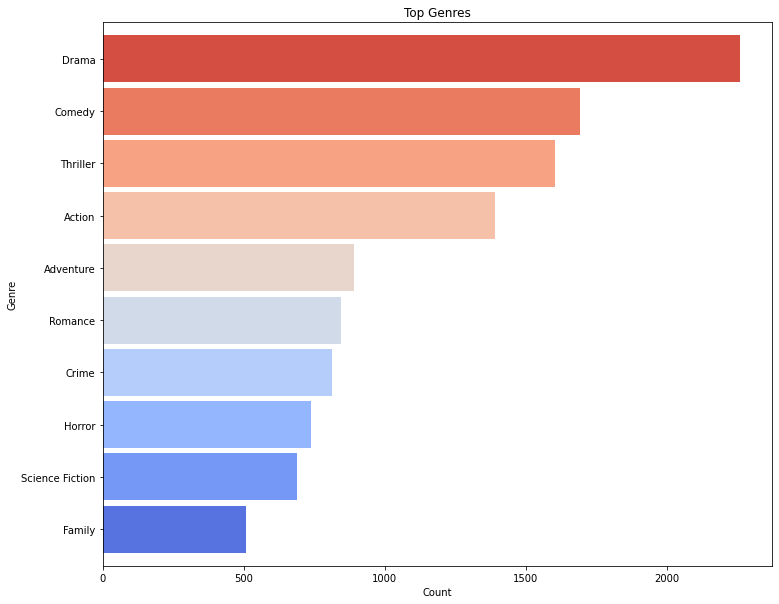

In [30]:
# Separate the genre based on the pipe (|).
genresList = movie_data['genres'].str.split('|')

# Create list of genres
genres = []
for i in genresList:
    genres.extend(i)
    
# Plot based on the value counts
plt.subplots(figsize=(12,10))
pd.Series(genres).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
plt.title('Top Genres')
set_label('Count', 'Genre')
plt.show()


it is clear from the above analysis of given dataset that the **Drama** is one of the most popular genre.

**What determines movie success in terms of profit? Is it the budget or genre or the production company or the actors that matter?**

In [0]:
# Get the profit values
movie_data['profit'] = movie_data['revenue_adj'] - movie_data['budget_adj']

In [33]:
movie_data.profit.describe()

count    5.024000e+03
mean     6.729390e+07
std      1.764580e+08
min     -4.139124e+08
25%     -8.039414e+06
50%      4.769215e+06
75%      7.174824e+07
max      2.750137e+09
Name: profit, dtype: float64

25% of movie do not make any profit.

let's find out the relatiion between budget and profit.

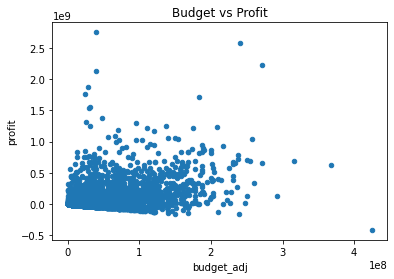

In [34]:
movie_data.plot.scatter(x='budget_adj', y='profit', title='Budget vs Profit')

it is clear from the scatterplot that low budget results high profit.

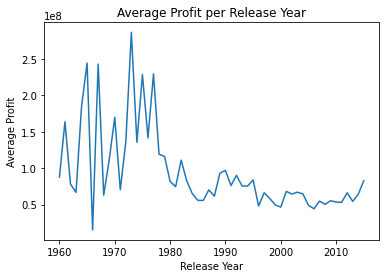

In [37]:
mean_profit_per_release_year = get_mean_profit_after_grouping_by_column(movie_data, 'release_year')
mean_profit_per_release_year.plot(title='Average Profit per Release Year')
set_label('Release Year', 'Average Profit')

 from the graph it is clear tha movies realeased in year between 1970-1980 make a high profit.

 let's see how popularity accounts the profit. 

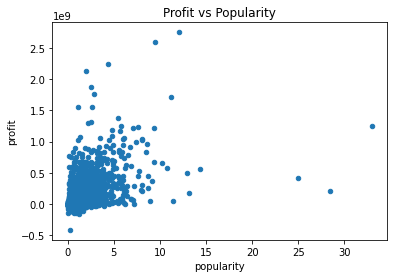

In [39]:
movie_data.plot.scatter(x='popularity', y='profit', title='Profit vs Popularity')

it is not clear because of weak correlation between popularity and profit.

let's try to find the relation between runtime and the profit.

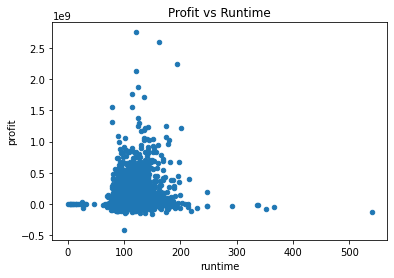

In [41]:
movie_data.plot.scatter(x='runtime', y='profit', title='Profit vs Runtime')

It is visible movies having runtime in between 100-200 make a profit.To be more clear about it. let's use median, which is less biased against outlier.

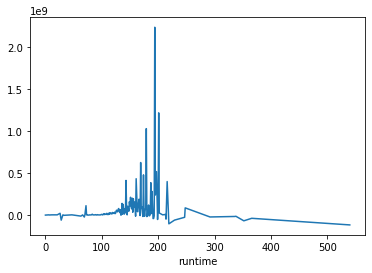

In [42]:
median_profit_per_runtime =  get_median_profit_after_grouping_by_column(movie_data, 'runtime')
median_profit_per_runtime.plot()

Now, it is clear that movie having runtime in between 100-200 make a good profit.

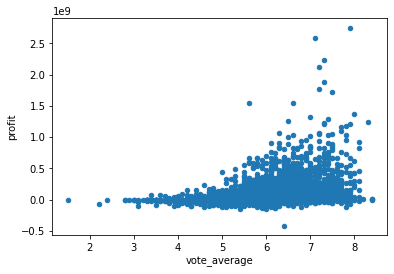

In [45]:
movie_data.plot.scatter(x='vote_average', y='profit')

From the graph above, it seems that the highter the vote, the higher the profit. However, the correlation might not be linear since it seems like movies with vote average less than 4 tend to all receive similar profit.

<a id='conclusions'></a>
## Conclusions

**Movie Genre**

> Drama is the most popular genre followed by Comedy.

**Profit Contributors**

> There are several feature that affect and don't affect the profit that the movie made, such as:


1.   It is not true that the higher the budget of the movie, the more profit it will make.
2.   The year the movie is made. The movie released on 1970 to 1980 seems to raised more money. This might be a thing to consider when cinema decides to open an old movie session.
3.   It seems that popularity does not affect the profit much. However, it seems like the vote does affect the profit.
4.   Most popular movie duration is less than 200 minutes. In fact, it is also the duration where movie made more money.






